# Data Science Milestone 2 Phase 2

by: Muhammad Farhan Zahirsyah

Batch 10

---
### Desctription
News is information about current events. This may be provided through many different media: word of mouth, printing, postal systems, broadcasting, electronic communication, or through the testimony of observers and witnesses to events. News is sometimes called "hard news" to differentiate it from soft media.[1]

investor use news to analyze where to invest and getting signal where the market is going, specificly market news. there are two analysis for buying an investment first are Fundamental analysis that evaluates stocks by attempting to measure their intrinsic value. Fundamental analysts study everything from the overall economy and industry conditions to the financial strength and management of individual companies. Earnings, expenses, assets, and liabilities all come under scrutiny by fundamental analysts. The second one is Technical analysis that differs from fundamental analysis, in that traders attempt to identify opportunities by looking at statistical trends, such as movements in a stock's price and volume. The core assumption is that all known fundamentals are factored into price, thus there is no need to pay close attention to them. Technical analysts do not attempt to measure a security's intrinsic value. Instead, they use stock charts to identify patterns and trends that suggest what a stock will do in the future. [2]

knowing the sentiment from news headlines we can analyze what is the current state of the market right now. if its positive the market are doing good, if its negative the market are doing a correction or quiete alarmingly a crisis wether is from goverment policy or natural disaster. 

the dataset is from cnbcindonesia.com in market rubics. it contains headlines from the last 2 months. the label is it positive, negative, or neutral is manually labelled by the author.



### Objective
- Determining sentiment analysis to news headlines

### Problem Statement
- How to determining sentiment analysis to news headlines


## I. Import Library

importing all library

In [1]:
# essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn
import keras_tuner as kt

# scikit-learn library model
from sklearn.naive_bayes import MultinomialNB


# scikit-learn library model selection & preprocess
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# tensorflow library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  Dense, Dropout, Embedding, TextVectorization, GlobalAvgPool1D

# import word cloud
from wordcloud import WordCloud

# removing warnings in cell
import warnings
warnings.filterwarnings('ignore')



printing version so the future reading for this notebook can adjust the library version for this notebook to work

In [2]:
print('Pandas Version     :',pd.__version__)
print('Numpy Version      :',np.__version__)
print('Matplotlib Version :',matplotlib.__version__)
print('Seaborn Version    :',sns.__version__)
print('Sklearn Version    :',sklearn.__version__)
print('Tensorflow Version :',tf.__version__)

Pandas Version     : 1.4.2
Numpy Version      : 1.21.5
Matplotlib Version : 3.4.3
Seaborn Version    : 0.11.2
Sklearn Version    : 1.0.2
Tensorflow Version : 2.9.0


## II. Data Loading

collecting dataset from local path

In [3]:
df_ori = pd.read_csv('data/cnbc_news_label_final.csv',)

In [4]:
df_ori.head()

,headline,label,sep,times
0,"Pendapatan Tumbuh, Laba SCMA Kok Malah Nyungs...",negative,Market,- 11 menit yang lalu
1,"Video Berkah Perang, KRAS Catat Lonjakan Eksp...",positive,Market,- 13 menit yang lalu
2,Ratusan Triliun Rupiah Lenyap dari AS & China...,positive,Market,- 16 menit yang lalu
3,Diskon Bayar Utang Up To 60% ke Negara Lanjut...,positive,Market,- 39 menit yang lalu
4,Bye Asing! Orang RI Makin Banyak Mau Ngutangi...,positive,Market,- 39 menit yang lalu


preview of 5 top index data

In [5]:
df_ori.head(5).T

,0,1,2,3,4
headline,"Pendapatan Tumbuh, Laba SCMA Kok Malah Nyungs...","Video Berkah Perang, KRAS Catat Lonjakan Eksp...",Ratusan Triliun Rupiah Lenyap dari AS & China...,Diskon Bayar Utang Up To 60% ke Negara Lanjut...,Bye Asing! Orang RI Makin Banyak Mau Ngutangi...
label,negative,positive,positive,positive,positive
sep,Market,Market,Market,Market,Market
times,- 11 menit yang lalu,- 13 menit yang lalu,- 16 menit yang lalu,- 39 menit yang lalu,- 39 menit yang lalu


preview of all columns including the row

In [6]:
df_ori.shape

(2367, 4)

In [7]:
df_ori.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
headline,2367,2364,"Nyaris Trading Halt, Pergerakan IHSG Mirip Aw...",2
label,2367,3,negative,821
sep,2367,1,Market,2367
times,2367,37,- 2 bulan yang lalu,406


all of them are categorical data with sep and times column will not be used for modeling

In [8]:
for i in df_ori.select_dtypes(include=['object']):
    print(i)
    print(df_ori[i].unique())
    print("-"*50)

headline
[' Pendapatan Tumbuh, Laba SCMA Kok Malah Nyungsep 14%? '
 ' Video Berkah Perang, KRAS Catat Lonjakan Ekspor Baja ke Eropa '
 ' Ratusan Triliun Rupiah Lenyap dari AS & China, Lari ke RI?  ' ...
 ' Ambyar! Hari Pertama Pasar Buka Harga Nikel Jatuh 8% '
 ' Video Eksklusif Investasi Langsung, BPJamsostek Lirik INA Juga Grup Pertamina '
 ' BBNI Salurkan Kredit Rp 257 M Untuk Proyek Nasional Ini ']
--------------------------------------------------
label
['negative' 'positive' 'neutral']
--------------------------------------------------
sep
['Market']
--------------------------------------------------
times
['  -  11 menit yang lalu ' '  -  13 menit yang lalu '
 '  -  16 menit yang lalu ' '  -  39 menit yang lalu '
 '  -  42 menit yang lalu ' '  -  46 menit yang lalu '
 '  -  49 menit yang lalu ' '  -  52 menit yang lalu '
 '  -  56 menit yang lalu ' '  -  1 jam yang lalu '
 '  -  2 jam yang lalu ' '  -  3 jam yang lalu ' '  -  4 jam yang lalu '
 '  -  5 jam yang lalu ' '  -  6 ja

above are preview what are the categorical values inside the object datatypes features


In [9]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  2367 non-null   object
 1   label     2367 non-null   object
 2   sep       2367 non-null   object
 3   times     2367 non-null   object
dtypes: object(4)
memory usage: 74.1+ KB


there are 2367 rows of data and there are no missing value

In [10]:
df_ori.isnull().sum()

headline    0
label       0
sep         0
times       0
dtype: int64

## III. Exploratory Data Analysis

first we want to see wether the target label is balanced or imbalanced

In [11]:
print(df_ori['label'].value_counts())
print('-'*50)
print('percentage yes/no: \n',(df_ori['label'].value_counts()/len(df_ori))*100)
print('-'*50)
print('percentage null: \n',(df_ori['label'].isnull().sum()/len(df_ori))*100)

negative    821
positive    812
neutral     734
Name: label, dtype: int64
--------------------------------------------------
percentage yes/no: 
 negative    34.685256
positive    34.305027
neutral     31.009717
Name: label, dtype: float64
--------------------------------------------------
percentage null: 
 0.0


surprisingly the target label is really balanced with each other

<AxesSubplot:xlabel='label', ylabel='count'>

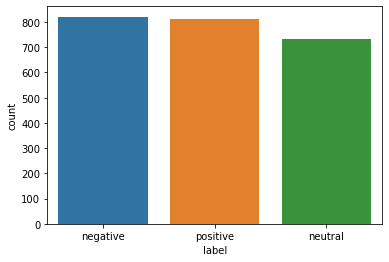

In [12]:
sns.countplot(x='label',data=df_ori)

above is the visualisation of distribution for each target label

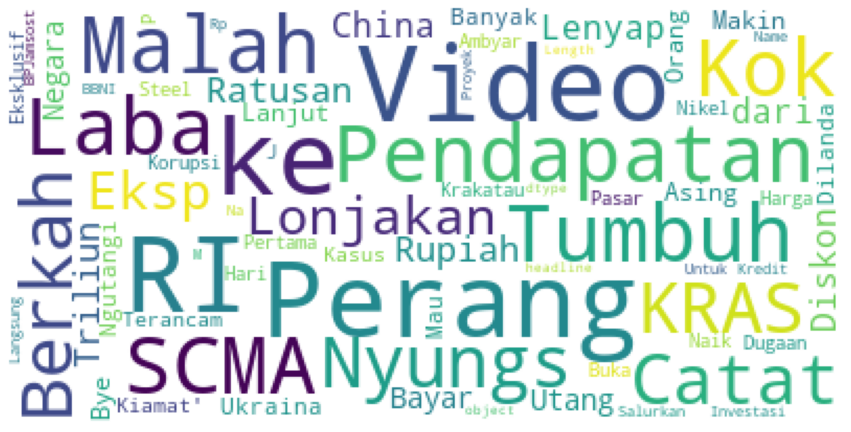

In [13]:
text = df_ori['headline']

wc = WordCloud(background_color='white', max_font_size=50, random_state=1).generate(str(text))

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

above are the word cloud inside the dataset headlines. there are some stop words that might be contained from the scrapping process. the word is "video" these word will be included in stop word processing.

because there is war in ukraine-rusia, the word "perang" is in this market rubics news, mostly affecting world economy.

## IV. Data Preprocessing

### Split data

before we handle the data we want to copy from the original dataframe data

In [14]:
data = df_ori.copy()

splitting data train, test  and validation. data validation is splitted from first split of data training

In [15]:
x = data['headline']
y = data['label']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.1,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(2130,)
(356,)
(237,)


there are more in the train data because the dataset is really small for a NLP model

## V. Feature Encoding

because we are going to make a benchmark model, then we are going to encoding using count vectorizer and then put it into machine learning model, in this case Naive Bayes model will be use for benchmark model

In [16]:
vect = CountVectorizer()

x_train_vec = vect.fit_transform(x_train)
x_val_vec = vect.transform(x_val)
x_test_vec = vect.transform(x_test)

rather than using ordinal encoder or label encoder, we use the .replace command to convert from string into numbers

and using those replacement for making one hot encoder using tensorflow to_categorical. then save it into variable y_train_ohe, y_val_ohe and y_test_ohe

In [17]:
y_train_replace = y_train.replace({'positive':1,'negative':2,'neutral':0})
y_val_replace = y_val.replace({'positive':1,'negative':2,'neutral':0})
y_test_replace = y_test.replace({'positive':1,'negative':2,'neutral':0})


y_train_ohe = to_categorical(y_train_replace)
y_val_ohe = to_categorical(y_val_replace)
y_test_ohe = to_categorical(y_test_replace)

## VI. Model 

### A. Base Benchmark Model

base benchmark model is used for benchmarking how much we can improve accuracy from this dataset. the base model using multinomial naive bayes

In [18]:
# modeling
model = MultinomialNB()
model.fit(x_train_vec, y_train)

MultinomialNB()

fitting the model into the dataset, and then predicting for classification report

In [19]:
y_pred = model.predict(x_val_vec)
y_train_pred = model.predict(x_train_vec)

print('validation report------------------------')
print(classification_report(y_val, y_pred))
print('training report--------------------------')
print(classification_report(y_train, y_train_pred))

validation report------------------------
              precision    recall  f1-score   support

    negative       0.68      0.83      0.75        76
     neutral       0.81      0.69      0.75        83
    positive       0.68      0.65      0.67        78

    accuracy                           0.72       237
   macro avg       0.73      0.72      0.72       237
weighted avg       0.73      0.72      0.72       237

training report--------------------------
              precision    recall  f1-score   support

    negative       0.84      0.94      0.88       745
     neutral       0.88      0.86      0.87       651
    positive       0.92      0.83      0.87       734

    accuracy                           0.88      2130
   macro avg       0.88      0.88      0.88      2130
weighted avg       0.88      0.88      0.88      2130



the result are accuracy in training data is 0.88 and validation data is 0.72. the model tend to overfit and we got the base number that we need to improve in neural network model

### B. Model Neural Network

before we determined the number of neurons or input,output from a layer, we need to know how long is the news sentence are. 

In [20]:
print(f'number of average length of the news  : {round(sum([len(i.split()) for i in x_train])/len(x_train))}')
print(f'maximum length of the news            : {round(max([len(i.split()) for i in x_train]))}')

number of average length of the news  : 9
maximum length of the news            : 16


because these words are the feature in this model, therefore we need to know the length of the news headlines are. maximum length of headline news is 16 and the average of leng of the news is 9. this will not be the fixed number for inputing into the layers. but we are know the range of features within 1 document.

In [21]:
text_vectorization = TextVectorization(max_tokens=1000,
                                        standardize="lower_and_strip_punctuation",
                                        split="whitespace",
                                        ngrams=None,
                                        output_mode="int",
                                        output_sequence_length=10,
                                        input_shape=(1,)
                                        )
text_vectorization.adapt(x_train)

using text vectorization for tokenization, max tokens are set into 1000 because the dataset is small and output sequence length from trial and error the best is 10

In [22]:
embedding = Embedding(input_dim=900,
                        output_dim=6,
                        embeddings_initializer="uniform",
                        input_length=10,
                        )

embedding only using 900 input dim from 1000 in text vectorization, and input length is equal from text vectorization process before. and then output dim using trial and error the best is 10

In [23]:
model = Sequential([
    text_vectorization,
    embedding,
    GlobalAvgPool1D(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

im using Global average pool 1d because GRU or LTSM unable to make the model improve, overcomplicating the architecture with hidden layers are also making the model perfrom worse, therefore the architecture above are the best from trial and error.

then we fit the model into the training data

In [24]:
model_1_history = model.fit(x_train,y_train_ohe, epochs=50, validation_data=(x_val, y_val_ohe))

Epoch 1/50
67/67 [==============================] - 50s 14ms/step - loss: 1.0941 - accuracy: 0.4390 - val_loss: 1.0872 - val_accuracy: 0.4895
Epoch 2/50
67/67 [==============================] - 0s 6ms/step - loss: 1.0772 - accuracy: 0.5653 - val_loss: 1.0709 - val_accuracy: 0.5612
Epoch 3/50
67/67 [==============================] - 0s 6ms/step - loss: 1.0553 - accuracy: 0.6103 - val_loss: 1.0490 - val_accuracy: 0.5949
Epoch 4/50
67/67 [==============================] - 0s 6ms/step - loss: 1.0287 - accuracy: 0.6554 - val_loss: 1.0231 - val_accuracy: 0.6498
Epoch 5/50
67/67 [==============================] - 0s 5ms/step - loss: 0.9982 - accuracy: 0.6587 - val_loss: 0.9949 - val_accuracy: 0.6371
Epoch 6/50
67/67 [==============================] - 0s 7ms/step - loss: 0.9662 - accuracy: 0.6958 - val_loss: 0.9648 - val_accuracy: 0.6667
Epoch 7/50
67/67 [==============================] - 0s 6ms/step - loss: 0.9275 - accuracy: 0.7005 - val_loss: 0.9340 - val_accuracy: 0.6751
Epoch 8/50
67/67 [

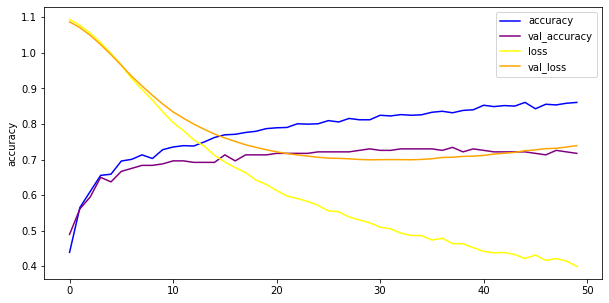

In [25]:
metrics = pd.DataFrame(model_1_history.history)
plt.figure(figsize=(10,5))
sns.lineplot(x=metrics.index, y='accuracy', data=metrics,color='blue')
sns.lineplot(x=metrics.index, y='val_accuracy', data=metrics,color='purple')
sns.lineplot(x=metrics.index, y='loss', data=metrics,color='yellow')
sns.lineplot(x=metrics.index, y='val_loss', data=metrics,color='orange')
plt.legend(['accuracy','val_accuracy','loss','val_loss'])
plt.show()

after around ecpoch 10-15 the model stagnant and loss are getting wider and wider, but this is good enough architecture for us to improve in hyperparameter tuning

In [26]:
y_pred_model_1 = model.predict(x_val)
y_train_pred_model_1 = model.predict(x_train)
y_pred_model_1 = np.argmax(y_pred_model_1, axis=1)
y_train_pred_model_1 = np.argmax(y_train_pred_model_1, axis=1)
print('validation report------------------------')
print(classification_report(y_val_replace, y_pred_model_1))
print('training report--------------------------')
print(classification_report(y_train_replace, y_train_pred_model_1))

67/67 [==============================] - 0s 2ms/step
validation report------------------------
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        83
           1       0.64      0.68      0.66        78
           2       0.74      0.72      0.73        76

    accuracy                           0.72       237
   macro avg       0.72      0.72      0.72       237
weighted avg       0.72      0.72      0.72       237

training report--------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       651
           1       0.87      0.86      0.86       734
           2       0.89      0.90      0.89       745

    accuracy                           0.88      2130
   macro avg       0.88      0.88      0.88      2130
weighted avg       0.88      0.88      0.88      2130



the overall accuracy are almost equal with naive bayes benchmark model

In [27]:
y_pred_test_model_1 = model.predict(x_test)
y_pred_test_model_1 = np.argmax(y_pred_test_model_1, axis=1)
print('test report--------------------------')
print(classification_report(y_test_replace, y_pred_test_model_1))

12/12 [==============================] - 0s 10ms/step
test report--------------------------
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       119
           1       0.70      0.76      0.73       116
           2       0.80      0.78      0.79       121

    accuracy                           0.77       356
   macro avg       0.77      0.77      0.77       356
weighted avg       0.78      0.77      0.77       356



with test data the model outperform the validation data by 6% this is a good sign for the model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 10)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 10, 6)             5400      
                                                                 
 global_average_pooling1d (G  (None, 6)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense (Dense)               (None, 3)                 21        
                                                                 
Total params: 5,421
Trainable params: 5,421
Non-trainabl

the summary are in the embedding layer theres 5400 parameters with no dense hidden layer, and dropout is used for minimizing overfitting. we cant overcomplicated the model with another layer because it will not be suitable for these data.

after that save the model

In [29]:
# using comment in order to not overvite the model
#model.save('models/model_base_nlp')

## VII. Model Improvement

### Hyperparameter Tuning with Keras tuner

we are using keras tuner for tuning the hyperparameter in the architecture that we are made before. since the text vectorization needs to be adapt into the dataset, it cant be hypertune. 

In [30]:
def model_builder(hp):
  model = Sequential([
    text_vectorization,

    Embedding(input_dim=hp.Int('input_dim', min_value=900, max_value=1000, step=50),
              output_dim=hp.Int('output_dim', min_value=6, max_value=10, step=1),
              embeddings_initializer="uniform",
              input_length=hp.Int('input_length', min_value=8, max_value=12, step=1),
              ),
    
    GlobalAvgPool1D(),
    
    Dropout(hp.Float('drop_out', min_value=0.1, max_value=0.4, step=0.1)),

    Dense(3, activation='softmax')
  ])

  
  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                metrics=['accuracy'])

  return model

because the only thing that can be hypertune is in embedding, dropout and learning rate. we are tuning it with the range within the previous architecture. these minimize the search for looking outside the desired target accuracy

define the keras model using hyperband, and saving it into directory path for each epochs using obective val_accuracy, max epochs = 10 and factor = 3

In [31]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir_nlp',
                     project_name='keras_tuner_nlp')

INFO:tensorflow:Reloading Oracle from existing project my_dir_nlp\keras_tuner_nlp\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir_nlp\keras_tuner_nlp\tuner0.json


making callbacks for exit early if there is no improvement in model within 5 epochs the running will stopped

In [32]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuning search hyperparameter

In [33]:
tuner.search(x_train,y_train_ohe, epochs=50, validation_data=(x_val, y_val_ohe), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. 
best embedding input dimension: {best_hps.values['input_dim']}
best embedding output dimension: {best_hps.values['output_dim']}
best embedding input length: {best_hps.values['input_length']}
best dropout rate: {best_hps.values['drop_out']}
best learning rate: {best_hps.values['learning_rate']}
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. 
best embedding input dimension: 900
best embedding output dimension: 10
best embedding input length: 9
best dropout rate: 0.35
best learning rate: 0.01



now we got the best hyperparameter and the parameter are the best embedding input dimension is 900, best embedding output dimension is 8, best embedding input length is 8,
best dropout rate is 0.35,
best learning rate is 0.01

then we need to find the best epoch

In [34]:
model_tuner = tuner.hypermodel.build(best_hps)
history_tuner = model_tuner.fit(x_train,y_train_ohe, epochs=100, validation_data=(x_val, y_val_ohe),verbose=0)

val_acc_per_epoch = history_tuner.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 3


after we found out that the best epoch is 3 then we are going into train the model with best hyperparameter and best epoch

In [35]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train,y_train_ohe, epochs=best_epoch, validation_data=(x_val, y_val_ohe))

Epoch 1/3
67/67 [==============================] - 1s 10ms/step - loss: 0.9998 - accuracy: 0.5432 - val_loss: 0.8525 - val_accuracy: 0.6793
Epoch 2/3
67/67 [==============================] - 0s 6ms/step - loss: 0.7539 - accuracy: 0.7136 - val_loss: 0.7266 - val_accuracy: 0.6920
Epoch 3/3
67/67 [==============================] - 0s 6ms/step - loss: 0.6095 - accuracy: 0.7624 - val_loss: 0.7077 - val_accuracy: 0.7131


evaluation from the best hyperparameter and best epochs the result are quite okay with loss 0.6 and accuracy 0.75

In [36]:
eval_result = hypermodel.evaluate(x_test, y_test_ohe)
print("[test loss, test accuracy]:", eval_result)

12/12 [==============================] - 0s 4ms/step - loss: 0.6153 - accuracy: 0.7528
[test loss, test accuracy]: [0.6153205037117004, 0.7528089880943298]


saving the hypertuner model into anlp_model_tuner.tf

the code is in comment because perventing overwrite saving

In [37]:
# using comment in order to not overvite the model
# hypermodel.save('models/nlp_model_tuner.tf')

classification report from validation and train prediction

In [38]:
y_val_tuner = hypermodel.predict(x_val)
y_train_tuner = hypermodel.predict(x_train)
y_val_tuner = np.argmax(y_val_tuner, axis=1)
y_train_tuner = np.argmax(y_train_tuner, axis=1)
print('validation report------------------------')
print(classification_report(y_val_replace, y_val_tuner))
print('train report--------------------------')
print(classification_report(y_train_replace, y_train_tuner))

67/67 [==============================] - 0s 2ms/step
validation report------------------------
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        83
           1       0.64      0.69      0.66        78
           2       0.75      0.68      0.72        76

    accuracy                           0.71       237
   macro avg       0.72      0.71      0.71       237
weighted avg       0.72      0.71      0.71       237

train report--------------------------
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       651
           1       0.83      0.79      0.81       734
           2       0.85      0.83      0.84       745

    accuracy                           0.83      2130
   macro avg       0.83      0.83      0.83      2130
weighted avg       0.83      0.83      0.83      2130



there is not much improvement from the hypertune model and the base architecture model

In [39]:
y_test_tuner = hypermodel.predict(x_test)
y_test_tuner = np.argmax(y_test_tuner, axis=1)
print('test report--------------------------')
print(classification_report(y_test_replace, y_test_tuner))


12/12 [==============================] - 0s 3ms/step
test report--------------------------
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       119
           1       0.68      0.74      0.71       116
           2       0.79      0.74      0.76       121

    accuracy                           0.75       356
   macro avg       0.76      0.75      0.75       356
weighted avg       0.76      0.75      0.75       356



the result are within range of val accouracy and train accuracy, with the number is towards improvement. this is good sign

In [40]:
hypermodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 10)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 10, 10)            9000      
                                                                 
 global_average_pooling1d_3   (None, 10)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 9,033
Trainable params: 9,033
Non-traina

the summary are the only layer having parameter is in embedding layer. after that not much is in the neural network. it may be a simple architecture but it really suits with this small dataset

## IX. Model Inference

now we need to test the model into the model inference. the inference data is collected from other source of market news from kontan.com rather than from the source dataset cnbcindonesia.com, lets see how the model handle from different news sources

we are using the saved model from the hypertuned and base model

In [41]:
hyper_load = tf.keras.models.load_model('models/nlp_model_tuner.tf')
base_load = tf.keras.models.load_model('models/model_base_nlp')

the news we are going to test is below. from the perspective as an invesor these news are giving negative sentiment. 

In [42]:
teks = [['IHSG Terkoreksi 0,44% ke 6.883, Asing Lego BBRI, TLKM dan BUMI, Rabu (25/5)']]

predicting using base model

In [43]:
inference = base_load.predict(teks)
inference_class = np.argmax(inference, axis=1)
if inference_class[0] == 0:
    print(f'Neutral sentiment with confidence {inference[0][np.argmax([inference])]:.2f}%')
elif inference_class[0] == 1:
    print(f'Positive sentiment with confidence {inference[0][np.argmax([inference])]:.2f}%')
elif inference_class[0] == 2:
    print(f'Negative sentiment with confidence {inference[0][np.argmax([inference])]:.2f}%')

1/1 [==============================] - 1s 753ms/step
Negative sentiment with confidence 0.87%


the result are great. with high confidence level

now using the hypertune model

In [44]:
inference = hyper_load.predict(teks)
inference_class = np.argmax(inference, axis=1)
if inference_class[0] == 0:
    print(f'Neutral sentiment with confidence {inference[0][np.argmax([inference])]:.2f}%')
elif inference_class[0] == 1:
    print(f'Positive sentiment with confidence {inference[0][np.argmax([inference])]:.2f}%')
elif inference_class[0] == 2:
    print(f'Negative sentiment with confidence {inference[0][np.argmax([inference])]:.2f}%')

1/1 [==============================] - 0s 100ms/step
Negative sentiment with confidence 0.87%


the result are also great with the same confidence with base model

In [46]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('chromedriver.exe')
url="https://www.cnbcindonesia.com/market/indeks/5/1?date="
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
driver.close()
news_cnbc = [ news.get_text() for news in soup.find_all("div", {"class":"box_text"},"h2") ]
df_news = pd.DataFrame()
df_news['news'] = news_cnbc
df_news['news'] = df_news['news'].apply(lambda x: x.replace('\n', ' '))

headline = []
for i in range(len(df_news)):
    h=[]
    try:
        h,s,t=df_news['news'][i].partition('Market')
    except:
        pass
    headline.append(h)
df_news['news'] = headline
df_news['news'] =df_news['news'].apply(lambda y: np.nan if len(y)==0 else y)
df_news.replace('', np.nan, inplace=True)
df_news.dropna(inplace=True)

predict_cnbc = base_load.predict(df_news['news'])
predict_cnbc_class = np.argmax(predict_cnbc, axis=1)

predict_str = []
for i in range(len(predict_cnbc_class)):
    if predict_cnbc_class[i] == 0:
        predict_str.append('Neutral')
    elif predict_cnbc_class[i] == 1:
        predict_str.append('Positive')
    elif predict_cnbc_class[i] == 2:
        predict_str.append('Negative')

df_news['sentiment'] = predict_str

probability = []
for i in predict_cnbc:
    probability.append(f'{i[np.argmax(i)]:.2f}%')
df_news['confidence'] = probability

df_news

1/1 [==============================] - 0s 22ms/step


,news,sentiment,confidence
0,"Bitcoin cs Bergairah Lagi, Trauma Investor Mu...",Positive,0.48%
1,Ini Dia Triple Horor yang Ditakutkan Sri Muly...,Neutral,0.76%
2,"Bos Sawit Mau Info, Harga CPO Kembali To The ...",Positive,0.91%
3,"Video IHSG Akhir Mei Dibuka Menguat, 'Sell In...",Positive,0.77%
4,Rupiah 'Kumat'! Melemah Lagi Setelah Menguat ...,Negative,0.74%
5,"Hari Terakhir Perdagangan Mei, IHSG Masih Hij...",Positive,0.54%
6,"PP Presisi Terbitkan Obligasi Rp 500 M, Ini J...",Positive,0.51%
7,Video Eksklusif Lirik Daya Tarik Saham Teknol...,Neutral,0.75%
8,"Bursa Asia Dibuka Merah, Cuma STI-KOSPI yang ...",Negative,0.65%
9,Simak! Daftar 'Harta Karun' Indonesia yang Di...,Neutral,0.82%


these are the result from directly scrapping from front page of market rubics in cnbcindonesia.com for data inference and constantly updated whenever the program is run. 

## X. Summary

the base benchmark model with naive bayes algorithm giving a good performance model. the base neural network model only barely improving from the benchmark and the hypertuned model isn't improving much from base neural network model. 

this giving signal that the dataset isn't really consistent or plenty enough for giving  higher result. 

there is some insight while the author labeling the data:
- labeling must be with proffesional watch because some terms in market news sometimes really difficult to undestand by normal people.
- consistency must be preserved because sometimes labeling needs extra focus and mistakenly labeled news might be often happened. 
- perspective wether the news is positive or negative is also in consideration, for example Crude Palm Oil (CPO) price is going up. this is a good news for investor holding palm oil commodity but for economy and normal citizen it's not really a good thing. these could cause inflation. so perspective must be consistent and be carefully thought.

these label will be directly affecting the model performance therefore it is crucial that the data and label is good. 

in summary, overall model performance can be used for predicting sentiment for market news in bahasa indonesia in the current state and can provide investors information for decision making more quickly. 

## XI. Referensi

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011., citation link https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

Martín Abadi, et.al. TensorFlow: Large-scale machine learning on heterogeneous systems, 2015. Software available from tensorflow.org. citation link https://zenodo.org/record/6555127#.Yod0kehByM8

[1] News, Retrived From https://en.wikipedia.org/wiki/News

[2] Chirstina, M. 2022, Fundamental vs. Technical Analysis: What's the Difference?. Investopedia, Retrived From https://www.investopedia.com/ask/answers/difference-between-fundamental-and-technical-analysis/